In [1]:
#Importing the necessary packages
import apogee.tools.read as apread
import apogee.spec.plot as splot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
Lambda = splot.apStarWavegrid()

In [2]:
def find_nearest(array,value):
    index = (np.abs(array-value)).argmin()
    #return array[index]
    return index

In [3]:
def Brackett_EqW_Plot(loc_id, two_massid,number,left_limit,right_limit,bottom_limit,top_limit):
    spec_header = apread.apStar(loc_id, two_massid,ext=0,header=True)
    svhelio = spec_header[1]['SVHELIO']
    nvisits = spec_header[1]['NVISITS']
    n=number
    #calculate the emission line in a vacuum
    vhelio = spec_header[1]['VHELIO']
    doppler = spec_header[1]['VRAD1']
    bc1 = spec_header[1]['BC1']
    
    
    if nvisits == 1:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)
    else:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)[3]

    c = 299792
    rydberg = 1.0973731568539*(10**7)
    electron = 9.10938356*(10**-31)
    nucleus = 1.672621898*(10**-27)
    fracryd = rydberg/(1+(electron/nucleus))
    vacuum = fracryd*((1./16.)-(1./(float(n**2))))
    lambda_obs = 1/vacuum
    #calculated_point1 = lambda_obs*((1-(vhelio/c))/(1-(doppler/c)))
    #calculated_point1 = lambda_obs*(1-(bc1/c))
    #calculated_point1 = lambda_obs*(1-(vhelio/c))
    vhelio1 = -svhelio
    calculated_point1 = lambda_obs*(1-((vhelio1)/c))
    diff2 = (lambda_obs-calculated_point1)*(10**10)
    calculated_point2 = calculated_point1*(10**10)
    
    
    
    centerline = find_nearest((Lambda+diff2),(lambda_obs*(10**10)))
    
    
        
    L1 = centerline - 135
    L2 = centerline - 90
    R1 = centerline + 90
    R2 = centerline + 135
    Lwindow = centerline - 160
    Rwindow = centerline + 160
    
    #Calculate Fc
    lsum= np.sum(spec1[L1:L2])/ len(spec1[L1:L2])
    rsum = np.sum(spec1[R1:R2])/len(spec1[R1:R2])
    Fc= (lsum+rsum)/2
    
    #Calculate Equivalent Width
    EqW=0
    for i in range(L2,R1):
        summ=(Fc*(Lambda[i+1]-Lambda[i]))-((1./2.)*(Lambda[i+1]-Lambda[i])*(spec1[i+1]+spec1[i]))
        EqW = EqW + summ
    EqW = abs(EqW/Fc)
    upper = Lambda[centerline]+(EqW/2)
    lower = Lambda[centerline]-(EqW/2)
    
    height_up = (4/3)*spec1[centerline]
    height_lower = (1/3)*spec1[centerline]
    
    #Plot averaged spectrum with EqW
    fig,ax = plt.subplots(figsize=(16,8))
    plt.plot((Lambda+diff2),spec1,linewidth=2.5,label='Shifted')
    plt.plot(Lambda,spec1,linewidth=2.5,label='Unshifted')
    plt.axhline(y=Fc,ls='dashed',color='black')
    plt.axvline(x=Lambda[centerline]+diff2,ls='dashed',color='r',label='Rest Emission')
    plt.axvline(calculated_point2,ls=':',color='r',label='Star Emission')
    plt.axvspan(Lambda[L1]+diff2,Lambda[L2]+diff2,color='green',alpha=0.2)
    plt.axvspan(Lambda[R1]+diff2,Lambda[R2]+diff2,color='green',alpha=0.2)
    plt.axvspan(lower+diff2,upper+diff2,ymin=0,ymax= 1/3,facecolor='blue',alpha=0.35)
    
    #labels
    plt.legend()
    plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
    plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
    plt.xlim(left_limit,right_limit)
    plt.ylim([height_lower,height_up])
    
    ax.tick_params(axis='both', labelsize=20)

    print(svhelio,calculated_point2,spec1[centerline])

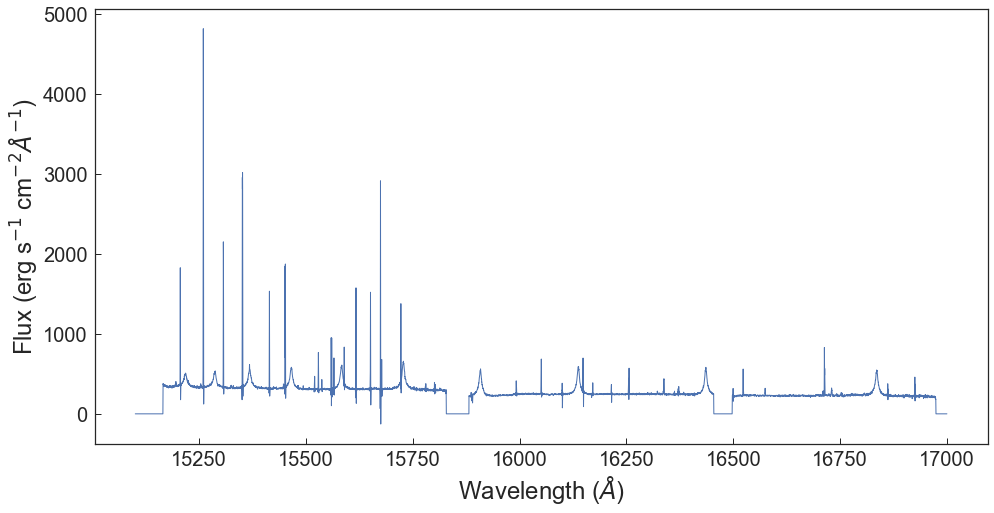

In [4]:
loc_id = 4617
two_massid='2M06450343-0034140'
spectest1 = apread.apStar(loc_id,two_massid,ext=1,header=False)[3]
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(Lambda,spectest1,linewidth=1)
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
#plt.ylim(0,1300);

449.349 16836.377095392483 534.38


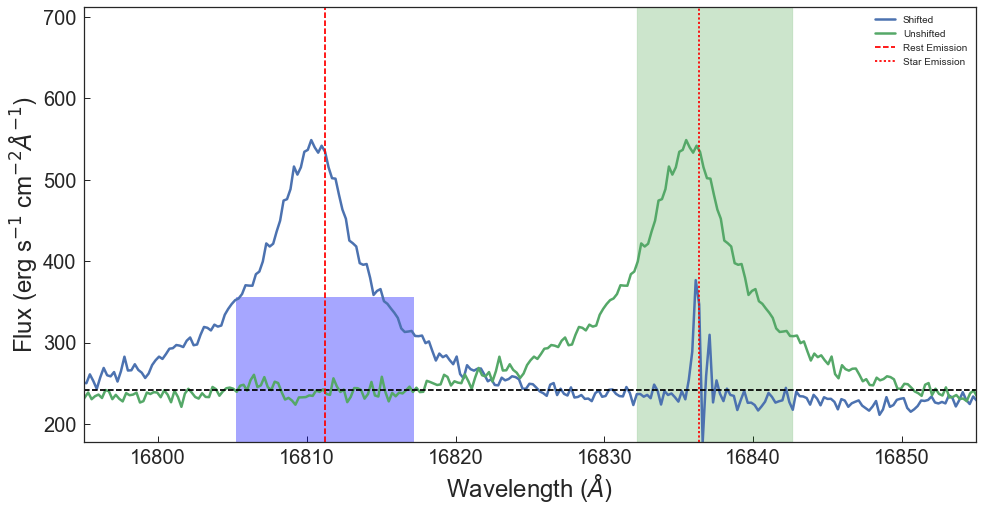

In [5]:
Brackett_EqW_Plot(4617,'2M06450343-0034140',11,16795,16855,100,600)

1306.57 16884.4467435544 2514.57


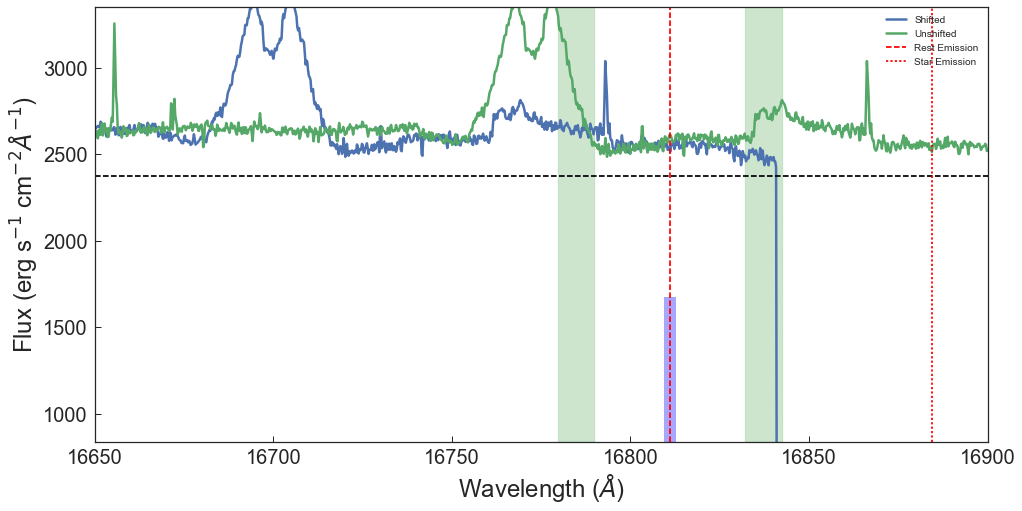

In [6]:
Brackett_EqW_Plot(4581,'2M06525305-1000270',11,16650,16900,2000,4000)

-309.704 16793.812330126293 1211.03


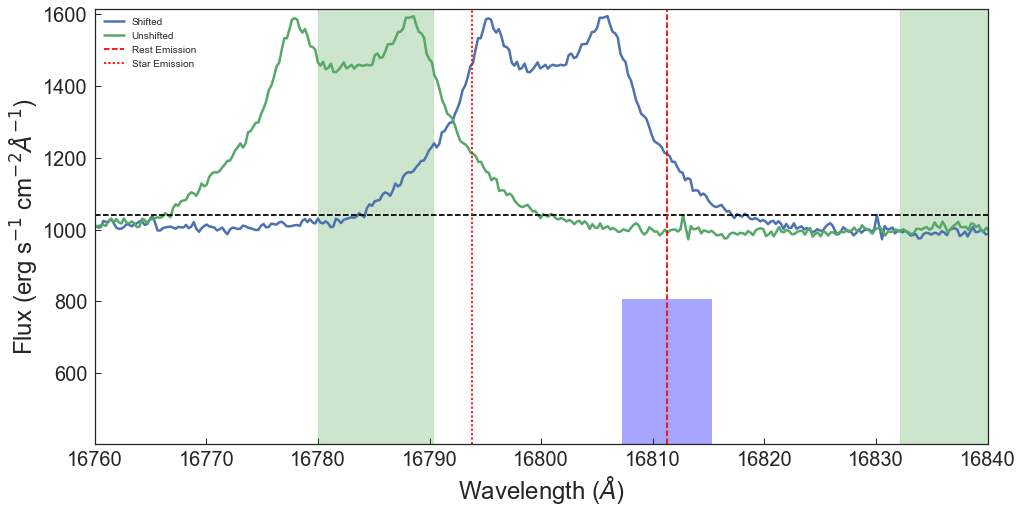

In [7]:
Brackett_EqW_Plot(4380,'2M18194176-1058093',11,16760,16840,500,2000)

In [8]:
spectest2 = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)
spectest2

(None, 
 SIMPLE  =                    T /image conforms to FITS standard
 BITPIX  =                   16 /bits per data value
 NAXIS   =                    0 /number of axes
 EXTEND  =                    T /file may contain extensions
 DATE    = '2016-01-26'         / Creation UTC (CCCC-MM-DD) date of FITS header
 COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy
 COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H
 OBJID   = '2M03434449+3143092' / Object ID
 J       =              12.3230 / 2MASS J magnitude
 H       =              10.7850 / 2MASS H magnitude
 K       =              9.53800 / 2MASS Ks magnitude
 TARG1   =          -2147352576 / First APOGEE targeting flag (bitwise, see docs)
 TARG2   =          -2147475456 / Second APOGEE targeting flag (bitwise, see docs
 TARG3   =                    0 / Third APOGEE targeting flag (bitwise, see docs)
 SURVEY  = 'apogee  '           / Survey name (for targeting flags)
 TELESCOP= '

In [9]:
spectest3 = apread.apStar(4581,'2M06525305-1000270',ext=0,header=True)
spectest3

(None, 
 SIMPLE  =                    T /image conforms to FITS standard
 BITPIX  =                   16 /bits per data value
 NAXIS   =                    0 /number of axes
 EXTEND  =                    T /file may contain extensions
 DATE    = '2016-01-26'         / Creation UTC (CCCC-MM-DD) date of FITS header
 COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy
 COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H
 OBJID   = '2M06525305-1000270' / Object ID
 J       =              8.96300 / 2MASS J magnitude
 H       =              8.97100 / 2MASS H magnitude
 K       =              8.95200 / 2MASS Ks magnitude
 TARG1   =          -2147352512 / First APOGEE targeting flag (bitwise, see docs)
 TARG2   =          -2147450368 / Second APOGEE targeting flag (bitwise, see docs
 TARG3   =                    0 / Third APOGEE targeting flag (bitwise, see docs)
 SURVEY  = 'apogee  '           / Survey name (for targeting flags)
 TELESCOP= '

In [10]:
spectest4 = apread.apStar(4380,'2M18194176-1058093',ext=0,header=True)
spectest4[1]['SYNTHSCA']

0.0